In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/zakg04/Documents/HBC_lab/BOOST/Main/TaskLogic/data/test/test-7005/processed/WL/7005_WL_A.csv')

listA = [['book', 'flower', 'train', 'rug', 'meadow', 'harp', 'salt', 'finger', 'apple', 'log', 'button', 'key', 'gold', 'rattle'],['bowl', 'dawn', 'judge', 'grant', 'insect', 'plane', 'county', 'pool', 'seed', 'sheep', 'meal', 'coat', 'bottle', 'peach', 'chair']]

test = df[df['block_c'] != 'prac']
test = test[1:]
test


,block_c,block_dur,condition,countdown,datetime,endtime,list,multichar_response,project,response,response_time,session_number,start_end,starttime,subject_id,task,task_vers,trial
7,1,1.621,learn,58379.000187,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,140204.9,A,b,O,b,1607,1,1614.8,138590.1,7005,WL,A,1.0
8,1,1.837,learn,58163.000107,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,140421.1,A,bo,O,o,203,1,1831.0,138590.1,7005,WL,A,1.0
9,1,2.005,learn,57995.000124,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,140588.9,A,boo,O,o,149,1,1998.8,138590.1,7005,WL,A,1.0
10,1,2.371,learn,57629.000187,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,140954.8,A,book,O,k,344,1,2364.7,138590.1,7005,WL,A,1.0
11,1,2.889,learn,57111.000061,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,141473.1,A,bookenter,O,enter,508,1,2883.0,138590.1,7005,WL,A,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7,28.191,immed,31809.000015,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,778482.9,A,goldenter,O,enter,623,1,1355.9,777127.0,7005,WL,A,14.0
613,7,38.091,immed,21909.000158,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,788382.8,A,l,O,l,9893,1,9899.6,778483.2,7005,WL,A,15.0
614,7,38.324,immed,21676.000118,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,788615.9,A,lo,O,o,213,1,10132.7,778483.2,7005,WL,A,15.0
615,7,38.340,immed,21660.000086,Fri Aug 02 2024 13:44:50 GMT-0500 (Central Day...,788632.4,A,log,O,g,0,1,10149.2,778483.2,7005,WL,A,15.0


In [2]:
#dist/immed = if 'condition' is distr or immed

dist = test[test['condition'] == 'distr']
immed = test[test['condition'] == 'immed']



In [3]:
#if 'enter' in response, store the line numbers for before either the enter before or the beginning of the df (for the first word) in a list of lists

dist_words = []
immed_words = []

for i in range(len(dist)):
    if i == 0:
        for j in range(len(dist)):
            if dist.iloc[j]['response'] == 'enter':
                dist_words.append([0, j])
                break
    elif dist.iloc[i]['response'] == 'enter':
        for j in range(i+1, len(dist)):
            if dist.iloc[j]['response'] == 'enter':
                dist_words.append([i+1, j])
                break
    
for i in range(len(immed)):
    if i == 0:
        for j in range(len(immed)):
            if immed.iloc[j]['response'] == 'enter':
                immed_words.append([0, j])
                break
    elif immed.iloc[i]['response'] == 'enter':
        for j in range(i+1, len(immed)):
            if immed.iloc[j]['response'] == 'enter':
                immed_words.append([i+1, j])
                break
# for ranges in dist and immed, add the characters before the string 'enter' in 'multichar_response' to the beginning of each list in list of lists

for i in range(len(dist_words)):
    dist_words[i].insert(0, dist.iloc[dist_words[i][1]]['multichar_response'][:-5])

for i in range(len(immed_words)):
    immed_words[i].insert(0, immed.iloc[immed_words[i][1]]['multichar_response'][:-5])


# for the ranges in each list of lists, if the string 'backspace' is in 'response' add a 1 to the end of the list, else add a 0
count = 0
for i in range(len(dist_words)):
    for j in range(dist_words[i][1], dist_words[i][2]):
        if 'backspace' in dist.iloc[j]['response']:
            count = 1
    dist_words[i].append(count)
    count = 0


count = 0
for i in range(len(immed_words)):
    for j in range(immed_words[i][1], immed_words[i][2]):
        if 'backspace' in immed.iloc[j]['response']:
            count = 1
    immed_words[i].append(count)
    count = 0
    
dist_words


[['bowl', 0, 4, 0],
 ['dawn', 5, 9, 0],
 ['judge', 10, 15, 0],
 ['grant', 16, 21, 0],
 ['insect', 22, 28, 0],
 ['plane', 29, 34, 0],
 ['county', 35, 41, 0],
 ['pool', 42, 46, 0],
 ['seed', 47, 51, 0],
 ['sheep', 52, 57, 0],
 ['meal', 58, 62, 0],
 ['coat', 63, 67, 0],
 ['peach', 68, 73, 0],
 ['bottle', 74, 84, 1],
 ['chair', 85, 90, 0]]

In [4]:
# for the ranges in each list of lists, subtract the block_dur of the last line number from the block_dur of the first line number and add the result to the end of the list
for i in range(len(dist_words)):
    dist_words[i].append(dist.iloc[dist_words[i][2]]['block_dur']-dist.iloc[dist_words[i][1]]['block_dur'])

for i in range(len(immed_words)):
    immed_words[i].append(immed.iloc[immed_words[i][2]]['block_dur']-immed.iloc[immed_words[i][1]]['block_dur'])
dist_words

[['bowl', 0, 4, 0, 1.0350000858306885],
 ['dawn', 5, 9, 0, 1.2020001411437984],
 ['judge', 10, 15, 0, 3.3559999465942383],
 ['grant', 16, 21, 0, 1.0839998722076398],
 ['insect', 22, 28, 0, 1.4359998703002947],
 ['plane', 29, 34, 0, 0.8529999256134051],
 ['county', 35, 41, 0, 0.9030001163482666],
 ['pool', 42, 46, 0, 1.035999774932863],
 ['seed', 47, 51, 0, 1.1349999904632568],
 ['sheep', 52, 57, 0, 1.3519999980926514],
 ['meal', 58, 62, 0, 1.0010001659393346],
 ['coat', 63, 67, 0, 2.821000099182129],
 ['peach', 68, 73, 0, 3.00600004196167],
 ['bottle', 74, 84, 1, 2.4870002269744873],
 ['chair', 85, 90, 0, 0.8179998397827148]]

In [5]:

def fuzzy(sub_list, word_list):

    from fuzzywuzzy import fuzz
    from fuzzywuzzy import process

    count =0
    used = []
    passed =[]
    #iterate through the list of lists and compare the first element of each list to all in list of words
    #the word in sub_list that has the highest ratio to a word in word_list is the word that is most similar
    #if that ratio is greater than 80, add 1 to count
    for i in range(len(sub_list)):
        for j in range(len(word_list)):
            ratio = fuzz.ratio(sub_list[i][0], word_list[j])
            if ratio > 80 and word_list[j] not in used:
                count += 1
                used.append(word_list[j])
                passed.append(sub_list[i][0])
                break
    return count/len(word_list), passed 

def absolute(sub_list, word_list):

    count = 0
    used = []
    passed = []
    for i in range(len(sub_list)):
        for j in range(len(word_list)):
            if sub_list[i][0] == word_list[j] and word_list[j] not in used:
                count += 1
                used.append(word_list[j])
                passed.append(sub_list[i][0])
                break
    return count/len(word_list), passed 

fuzzy_dist = fuzzy(dist_words, listA[1])
fuzzy_immed = fuzzy(immed_words, listA[0])

fuzzy_immed
    

/Users/zakg04/miniforge3/envs/tensorflow/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


(0.9285714285714286,
 ['book',
  'flower',
  'train',
  'meadow',
  'salt',
  'harp',
  'finger',
  'apple',
  'button',
  'log',
  'key',
  'rattle',
  'gold'])

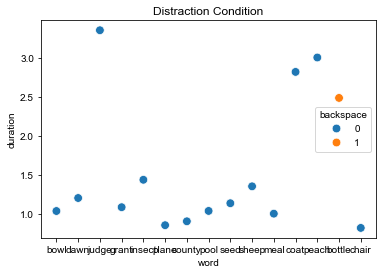

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

# create a dataframe with the list of lists
df_dist = pd.DataFrame(dist_words, columns = ['word', 'start', 'end', 'backspace', 'duration'])
df_immed = pd.DataFrame(immed_words, columns = ['word', 'start', 'end', 'backspace', 'duration'])

#plot the duratiion of each word for dist where blue is no backspace and red is backspace
sb.scatterplot(x = 'word', y = 'duration', data = df_dist, hue = 'backspace', s=75)
sb.set(rc={'figure.figsize':(20,10)})
plt.title('Distraction Condition')
#add an x if the word is wrong
for i in range(len(df_dist)):
    if df_dist.iloc[i]['word'] not in fuzzy_dist[1]:
        plt.text(i, df_dist.iloc[i]['duration'], 'x', fontsize=12, color='black')
plt.show()


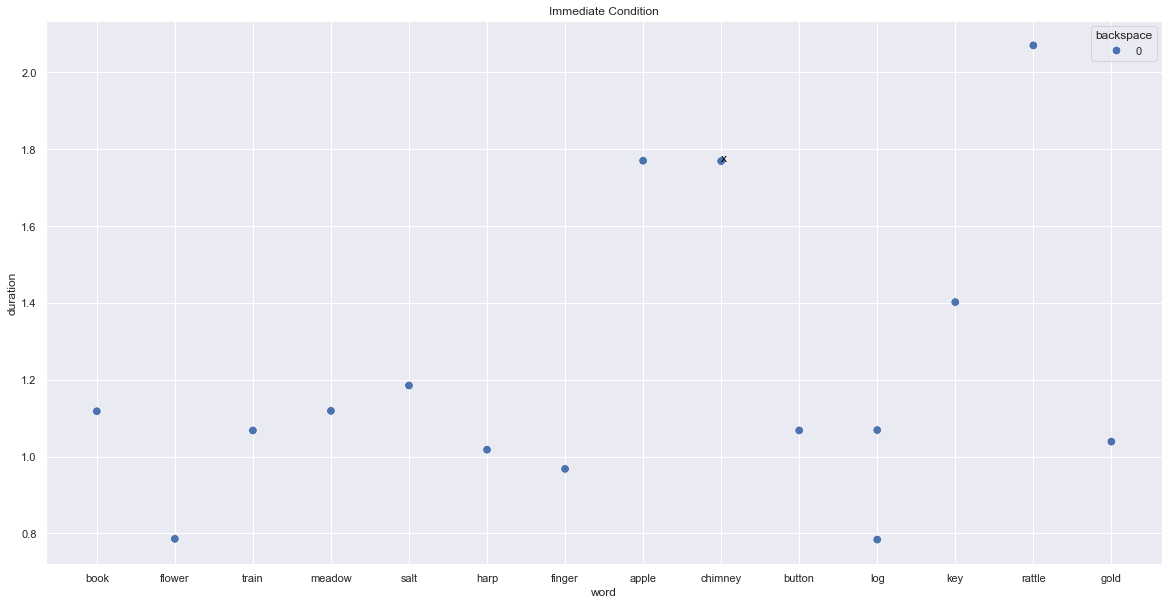

In [7]:
#plot the duratiion of each word for immed where blue is no backspace and red is backspace

sb.scatterplot(x = 'word', y = 'duration', data = df_immed, hue = 'backspace', s=75)
sb.set(rc={'figure.figsize':(20,10)})
plt.title('Immediate Condition')
#add an x if the word is wrong
for i in range(len(df_immed)):
    if df_immed.iloc[i]['word'] not in fuzzy_immed[1]:
        plt.text(i, df_immed.iloc[i]['duration'], 'x', fontsize=12, color='black')
plt.show()